In [1]:
import sys

In [4]:
from __future__ import unicode_literals, print_function, division

In [5]:
import glob
import os

In [6]:
def findFiles(path):
    
    return glob.glob(path)

In [8]:
findFiles("data/names/*.txt")

['data/names/Italian.txt',
 'data/names/Chinese.txt',
 'data/names/Greek.txt',
 'data/names/Vietnamese.txt',
 'data/names/Arabic.txt',
 'data/names/French.txt',
 'data/names/Scottish.txt',
 'data/names/Korean.txt',
 'data/names/Portuguese.txt',
 'data/names/Irish.txt',
 'data/names/Japanese.txt',
 'data/names/Polish.txt',
 'data/names/Dutch.txt',
 'data/names/English.txt',
 'data/names/German.txt',
 'data/names/Russian.txt',
 'data/names/Czech.txt',
 'data/names/Spanish.txt']

In [9]:
import unicodedata
import string

In [10]:
all_letters = string.ascii_letters + ".,;'"

In [11]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;'"

In [14]:
n_letters = len(all_letters)

In [21]:
def unicodeToAscii(s):
    
    return "".join([c for c in unicodedata.normalize("NFD", s) if unicodedata.category(c) != "Mn" and c in all_letters])

In [30]:
unicodeToAscii("Ślusàrski  ")

'Slusarski'

In [34]:
def readlines(path):
    
    with open(path) as f:
        
        data = f.read().split("\n")
        
        return [unicodeToAscii(line) for line in data if len(line) > 0]

In [38]:
from collections import defaultdict

In [63]:
all_categorys = set()
category_lines = defaultdict(lambda : list())

In [64]:
for filename in findFiles("./data/names/*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categorys.add(category)
    lines = readlines(filename)
    
    for line in lines:
        category_lines[category].append(line)

In [65]:
category_lines.keys()

dict_keys(['Italian', 'Chinese', 'Greek', 'Vietnamese', 'Arabic', 'French', 'Scottish', 'Korean', 'Portuguese', 'Irish', 'Japanese', 'Polish', 'Dutch', 'English', 'German', 'Russian', 'Czech', 'Spanish'])

In [66]:
n_categorys = len(all_categorys)

In [67]:
n_categorys

18

In [68]:
category_lines["Italian"][:5]

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']

In [69]:
import torch
import torch.nn as nn

In [86]:
all_categorys = list(all_categorys)

In [110]:
letter2index = defaultdict(lambda : len(letter2index))

In [111]:
category2index = defaultdict(lambda : len(category2index))

In [112]:
def lines2tensor(category_lines):
    data = []
    
    for category, lines in category_lines.items():
        
        category_tensor = torch.tensor([category2index[category]])
        
        for line in lines:
            
            lines_tensor = torch.tensor([letter2index[letter] for letter in line])
            data.append((lines_tensor, category_tensor))
    
    return data

In [113]:
data = lines2tensor(category_lines) # (name_length, ), (1, )

In [114]:
letter2index

defaultdict(<function __main__.<lambda>()>,
            {'A': 0,
             'b': 1,
             'a': 2,
             'n': 3,
             'd': 4,
             'o': 5,
             't': 6,
             'g': 7,
             'e': 8,
             'l': 9,
             'u': 10,
             'i': 11,
             'v': 12,
             's': 13,
             'c': 14,
             'h': 15,
             'r': 16,
             'm': 17,
             'q': 18,
             'f': 19,
             'j': 20,
             'p': 21,
             'z': 22,
             'B': 23,
             'C': 24,
             'D': 25,
             "'": 26,
             'E': 27,
             'F': 28,
             'G': 29,
             'I': 30,
             'L': 31,
             'M': 32,
             'N': 33,
             'O': 34,
             'P': 35,
             'Q': 36,
             'R': 37,
             'S': 38,
             'y': 39,
             'T': 40,
             'U': 41,
             'V': 42,
             'Z': 43

$h_i = g(W_h [x_i, h_{i-1}] + b_h)$

$o_i = f(W_o h_i + o_h)$

In [120]:
class RNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size):
        
        super(RNN, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_size) # (1, embedding_size)
        
        self.hidden_size = hidden_size
        
        self.hidden_layer = nn.Linear(embedding_size + hidden_size, hidden_size) # (1, hidden_size)
        
        self.activate = torch.tanh
        
        self.output_layer = nn.Linear(hidden_size, output_size) # (1, output_size)
        
        self.softmax = nn.Softmax(dim=1) # (1, output_size)
        
    
    def forward(self, inputs, past_hidden_state):
        
        # inputs: (1,)
        # hidden_state: (1, hidden_size) 
        
        inputs = self.embedding(inputs) # (1, embedding_size)
        
        combined = torch.cat([inputs, past_hidden_state], dim=1) # (1, hidden_size + embeddin_size)
        
        new_hidden_state = self.hidden_layer(combined) # (1, hidden_size)
        
        new_hidden_state = self.activate(new_hidden_state) # (1, hidden_size)
        
        output = self.output_layer(new_hidden_state) # (1, output_size)
        
        output = self.softmax(output) # (1, output_size)
        
        return output, new_hidden_state
    
    def init_hidden_state(self):
        
        return torch.zeros(size=(1, self.hidden_size))

In [123]:
category2index

defaultdict(<function __main__.<lambda>()>,
            {'Italian': 0,
             'Chinese': 1,
             'Greek': 2,
             'Vietnamese': 3,
             'Arabic': 4,
             'French': 5,
             'Scottish': 6,
             'Korean': 7,
             'Portuguese': 8,
             'Irish': 9,
             'Japanese': 10,
             'Polish': 11,
             'Dutch': 12,
             'English': 13,
             'German': 14,
             'Russian': 15,
             'Czech': 16,
             'Spanish': 17})

In [122]:
hidden_size = 128
embedding_size = 128

In [124]:
rnn = RNN(len(letter2index), embedding_size, hidden_size, len(category2index))

In [129]:
rnn.modules

<bound method Module.modules of RNN(
  (embedding): Embedding(54, 128)
  (hidden_layer): Linear(in_features=256, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=18, bias=True)
  (softmax): Softmax(dim=1)
)>

In [132]:
for para in rnn.parameters():
    
    print(para)

Parameter containing:
tensor([[-0.7797, -1.2518,  0.4284,  ...,  0.7151, -0.7165,  0.9524],
        [ 0.0936,  0.3631, -1.0419,  ...,  1.2990,  1.2439,  0.8844],
        [ 0.0529, -1.0843, -0.6402,  ...,  0.0703, -2.8464,  0.2561],
        ...,
        [ 0.2985, -1.8349,  0.0696,  ...,  0.2422,  0.6331, -1.6247],
        [-1.5148, -0.5425,  1.4021,  ..., -1.6464, -1.0933, -2.0241],
        [ 0.0806, -0.1533,  1.1312,  ..., -0.6673,  0.4939,  0.0845]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0382,  0.0616,  0.0524,  ...,  0.0287,  0.0008,  0.0523],
        [ 0.0150, -0.0151, -0.0108,  ..., -0.0115,  0.0099,  0.0160],
        [ 0.0141, -0.0348,  0.0290,  ...,  0.0288,  0.0006, -0.0043],
        ...,
        [ 0.0566, -0.0546, -0.0021,  ...,  0.0351, -0.0302,  0.0585],
        [-0.0404, -0.0350,  0.0249,  ..., -0.0093,  0.0143, -0.0027],
        [ 0.0206,  0.0393, -0.0217,  ...,  0.0244, -0.0613,  0.0313]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0

In [139]:
import random
import time

In [140]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(rnn.parameters())

In [150]:
def train_one_step(name_tensor, category_tensor):
    
    hidden_state = rnn.init_hidden_state()
    
    for letter_tensor in name_tensor:
        
        output, hidden_state = rnn(letter_tensor.view(-1), hidden_state)
        
    
    pred = torch.argmax(output, dim=1) # (1, )
    
    output = torch.log(output) # (1, output_size)
    
    loss = criterion(output, category_tensor)
    
    optimizer.zero_grad()
    
    loss_value = loss.item()
    
    loss.backward()
    optimizer.step()
    
    return loss_value, 1 if pred[0] == category_tensor[0] else 0

In [151]:
loss_trace = []
acc_trace = []

In [152]:
EPOCH = 50

for epoch in range(EPOCH):
    
    random.shuffle(data)
    
    train_loss = 0
    correct = 0
    start_time = time.time()
    
    for name_tensor, category_tensor in data:
        
        tmp_loss, is_correct = train_one_step(name_tensor, category_tensor)
        train_loss += tmp_loss
        correct += is_correct
    
    print("Epoch: {}, time: {} seconds, loss: {}, acc: {}".
          format(epoch, time.time() - start_time, train_loss / len(data), correct / len(data)))
    
    loss_trace.append(train_loss / len(data))
    acc_trace.append(correct / len(data))

Epoch: 0, time: 123.33370923995972 seconds, loss: 0.9887915320416775, acc: 0.702600378599183
Epoch: 1, time: 122.93417501449585 seconds, loss: 0.8063479875556765, acc: 0.756899471953771
Epoch: 2, time: 123.50440907478333 seconds, loss: 0.7552931335030446, acc: 0.7722925176845671
Epoch: 3, time: 122.76604223251343 seconds, loss: 0.7316025959505944, acc: 0.7808109993025805
Epoch: 4, time: 122.70023345947266 seconds, loss: 0.7253832791290498, acc: 0.7765268506525854
Epoch: 5, time: 123.26445841789246 seconds, loss: 0.7138102116023768, acc: 0.7816578658961841
Epoch: 6, time: 121.79969096183777 seconds, loss: 0.7228516683235795, acc: 0.7824051011258344
Epoch: 7, time: 122.95416784286499 seconds, loss: 0.7056687686283678, acc: 0.7849457009066454
Epoch: 8, time: 123.4193856716156 seconds, loss: 0.7139133108799707, acc: 0.7798146856630467
Epoch: 9, time: 122.5112669467926 seconds, loss: 0.7171285944807184, acc: 0.7813091561223473
Epoch: 10, time: 122.78637623786926 seconds, loss: 0.71982871054

In [153]:
import matplotlib.pyplot as plt

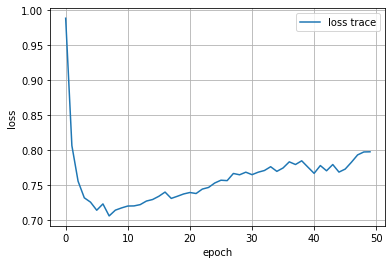

In [154]:
plt.plot(loss_trace, label="loss trace")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid()
plt.legend()

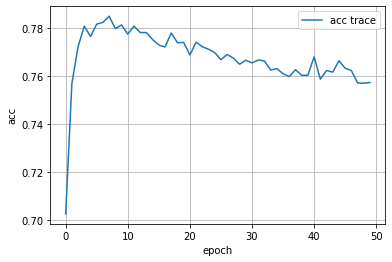

In [155]:
plt.plot(acc_trace, label="acc trace")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.grid()
plt.legend()